# Lecture 8: Automatic Speech Recognition I

Automatic speech recogition can be formulated as just a sequence prediction. Feature sequence extracted from the signal, given to a system that is predicting what is the next feature sequence. Why we are dealing with sequences? Since speech is not stationary, so we are looking at short-term processing features.

## Problem Formulation

We have an input, a sequence of words, a sentence, and we have a set of hypotheses (words, sentences), and we are trying to predict a text output figuring out what is the text being spoken in the input speech data. How to match an observed speech signal $\mathcal{S}$ with a word hypotheses $\mathcal{W_{k}}$?

Here we are considering that the predicted output will be $$\mathcal{\hat{W}} = \underset{W_{k}\in\space\mathcal{W}}{\mathrm{arg\space max}}\space \mathrm{Match}(W_{k}, S)$$ where we are considering that the matching function is rather like a probability function than a distance function, hence the $\mathrm{arg\space max}$. (A matter of convention, and can easily be replaced by a $\mathrm{arg\space min}$ if the matching function is closer to a distance function).

To solve this equation, we would need to solve three subproblems.
1. Matching function definition - Sequence Matching
2. Arg max optimization definition - Search Method
3. What is the set of word hypotheses $\mathcal{W}$ - Sequence Generation - Language Model

I would need to have a sequence generation model, a good seach method, because the sequences (set of word hypotheses) is unlimited and we want to make it practical, and finally, there has to be a good sequence matching model. In speech recognition, all of these problems/processes are being done simultaneously. We cannot have a full-breadth search AND an infinite set of sequences generation at the same time, AND matching the sequences.

### Sequence Generation

- Syntactical rule-based method
- Discrete Markov model (DMMs) -based method
- Neural-based method (including LLMs)

The three key statistical rules are still the same as always. 
1. Bayes's rule: $$P(A, B) = P(A | B)\cdot P(B) = P(B | A)\cdot P(A)$$
2. if $B_{k}$ (k = 1, ..., K) are mutually exclusive and collectively exhaustive ($\sum_{k=1}^{K} P(B_{k}) = 1$) $$P(A) = \sum_{k=1}^{K}P(A, B_{k})$$
3. Gibbs sampler: $$P(B_{1}, ..., B_{k}, ..., B_{K}) = \prod_{k=1}^{K}P(B_{k} | B_{k-1}, ..., B_{1})$$

The same principles of DMMs as before.

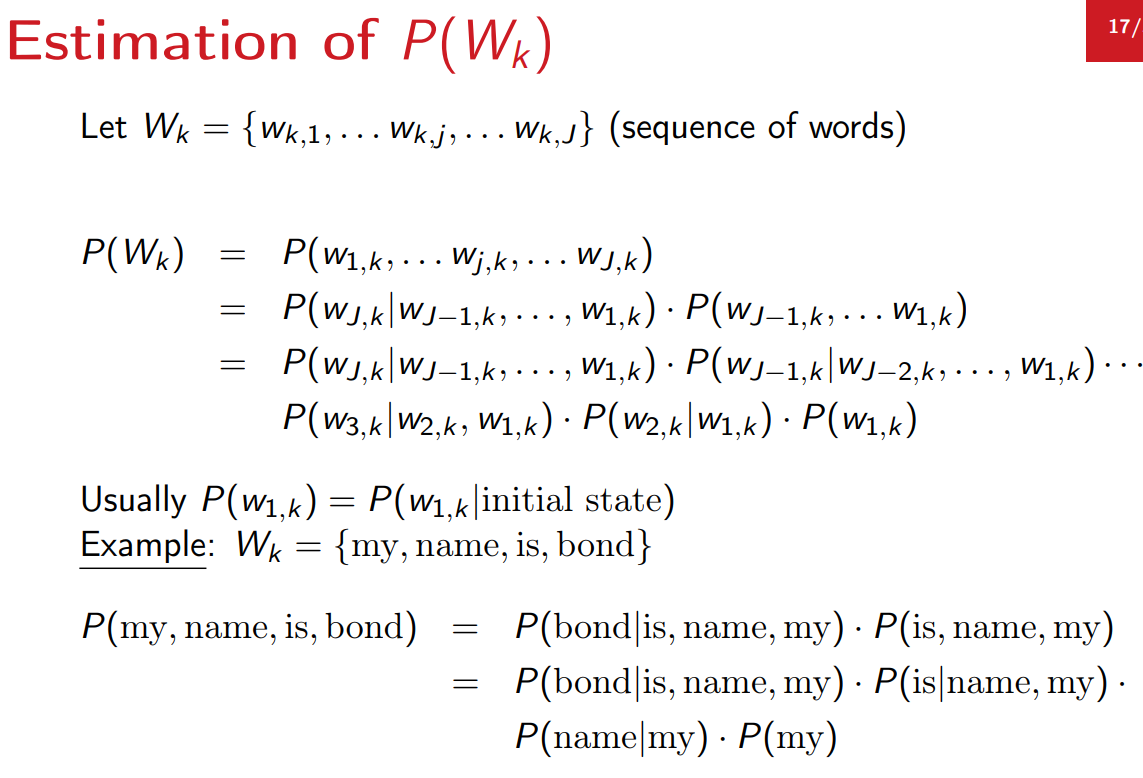

The problem of this rule is that it cannnot be done in practice, since the history of words is of variable length, and it keeps going, it is too many computations for just one sentence, especially if the sentence does not contain a full stop and it is a sequence of different sentences without stop.

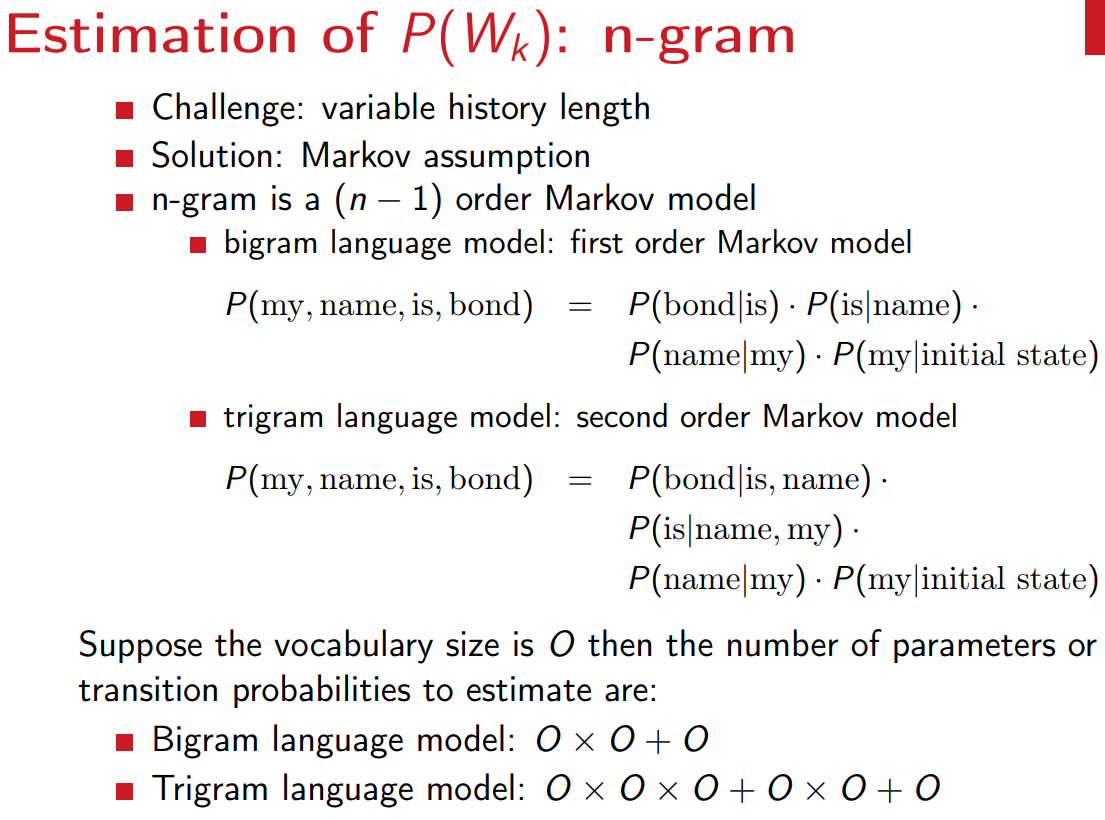

This is exactly why we have put a limit to the history being considered and being computed in the probability computation. Now practically speaking, in this DMM we only have to estimate the transition probability matrix, as well as the unigram (+ bigram if we have a trigram language model).

The problem with this model is its parameter estimation process & computation. We were never going to see all possible words and word sequences, our data was always going to be limited. Then, we cannot have enough data to robustly estimate the parameter.

$\rightarrow$ Techniques to make this practical enough.
We have to interpolate lower n-gram probabilities. We can NEVER have a zero-value probability. Back-off to lower order n-gram probabilities since it is practical.

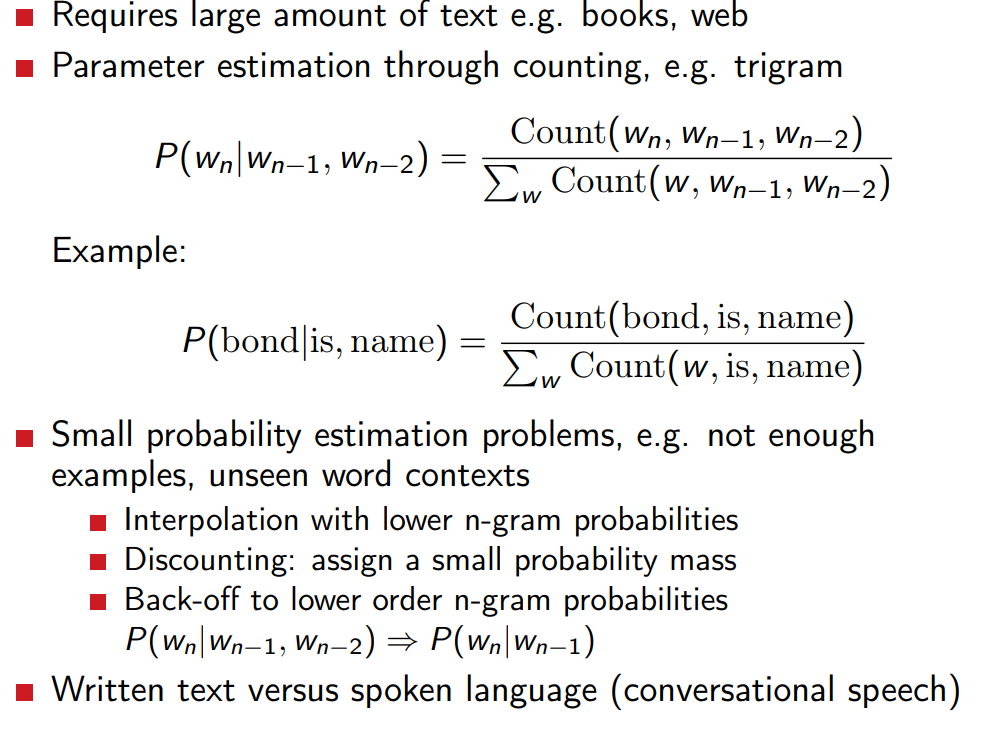

Models are trained and perform well on what they are trained on, meaning that most probably they will not be scaling well to other topics and contexts. People started thinking about dynamically changing the model (eg. football, tennis, etc...).

### String Matching (Sequence Matching)

We have two types of data that we are trying to match, text and sequences of numbers (signals, extracted features).

Abstract idea: We first have to figure out a shared latent symbol space, and then match the resulting two latent symbol sequences A and B.

For speech, the easiest most practical shared latent space we can come up with, would be phones. Because for each speech window, the speech signal contains the phone information and it can easily be extracted. But also, it is connected to our brain perception. For text, phones are encoded in the writing system, how it should be spoken is there in the written word.
An important aspect to check is the number of phones produced by each letter, this relationship can be much higher than 1 to 1, making this latent space much harder to encompass all information. (eg. english).
Phones are related to writing, related to acoustics, related to perception, and related to the production.

This brings us to four sub questions, that differ between different ASR methods and models: 

1. What is the shared latent symbol space?
2. How to map $S$ to a latent symbol sequence $B$?
3. How to map $W_{k}$ to a latent symbol sequence $A$?
4. How to match the two latet symbol sequences $A$ and $B$?

Now let's say we have two strings, one from a human transcriber, and the other from my ASR system. How to compare both strings? $\rightarrow \bf{Dynamic\space Programming}$

Optimal distance between two strings is composed of the optimal distance of sub-strings. Optimizing a problem is acheived by optimizing its sub-problems. 

Dyanmic Programming helps me to compute the word error rate.

## Knowledge-based approach

This brings us to an ASR method called knowledge-based approach, and they solved the four sub-questions.

1. Phones (linguistic knowledge-based)
2. Segment and label based on acoustic-phonetic knowledge (not frame by frame, but segment them on a phone basis)
3. Apply linguistic knowledge (eg. dictionnary)
4. Match two phone sequences (string matching) $\bf{\underset{W_{k}\in\space\mathcal{W}}{\mathrm{arg\space min}}}$ instead of $\bf{\underset{W_{k}\in\space\mathcal{W}}{\mathrm{arg\space max}}}$

This was working well, but it had the limitation of being overly reliant on knowledge to both segment AND label the segments and match them with phones, what if the segments do not contain the full phone, what if the phone is not correctly labelled to the segment. The easly decision taken to segment and label the phones make it difficult to recover from errors.

That's why we decided to use frame by frame processing, to look at the probabilistic evidence and not risk taking an ealy decision.

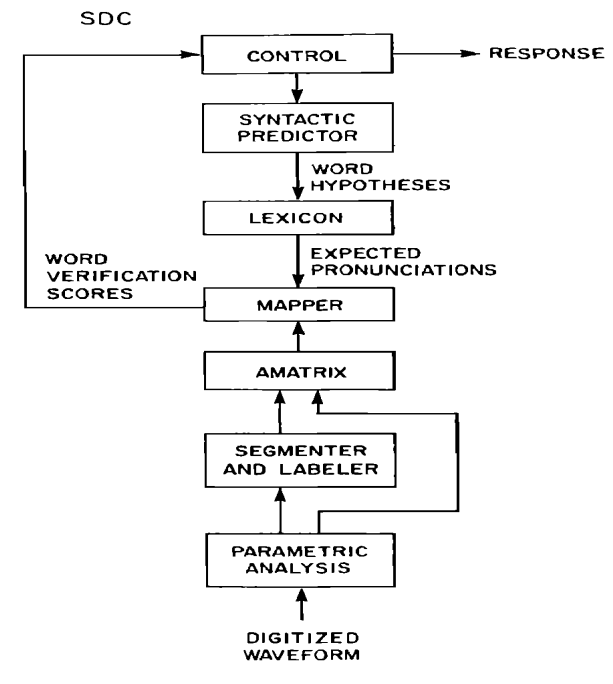

Today, we almost came back to the same approach, except we got rid of the segmenting and labelling part and these extra steps that we now know how to solve better and more securely. We proceed based on a frame-by-frame basis.

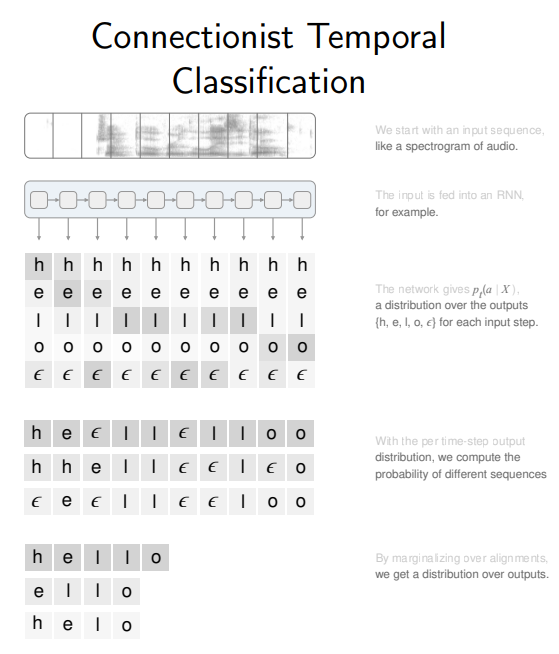

Other methods are also used, wether based on RNNs or transformers.

We are slowly changing the lower part of the diagram, because we do not want to be limited by the availability of the data, and we want to be able to recover from a wrong early decision.

Although the model ends up learning an internal language model from the training data, predicting which phone will follow the current phone. But the model still needs an external language model, whether n-gram, or LLM, RNN, or whatever the method. 

### Instance-based Approach

This is based on NOT using text, but rather audio instances, recorded, and then compared and matched with the input audio signal and so on.
So $W_{k}$ here is basically an audio segment/recording.

Analyzing the acoustic waveforms, we can easily extract the formant information and other features, not needing to directly analyze the speech signal, and based on this, we can easily match the extracted features to the input signal extracted features.

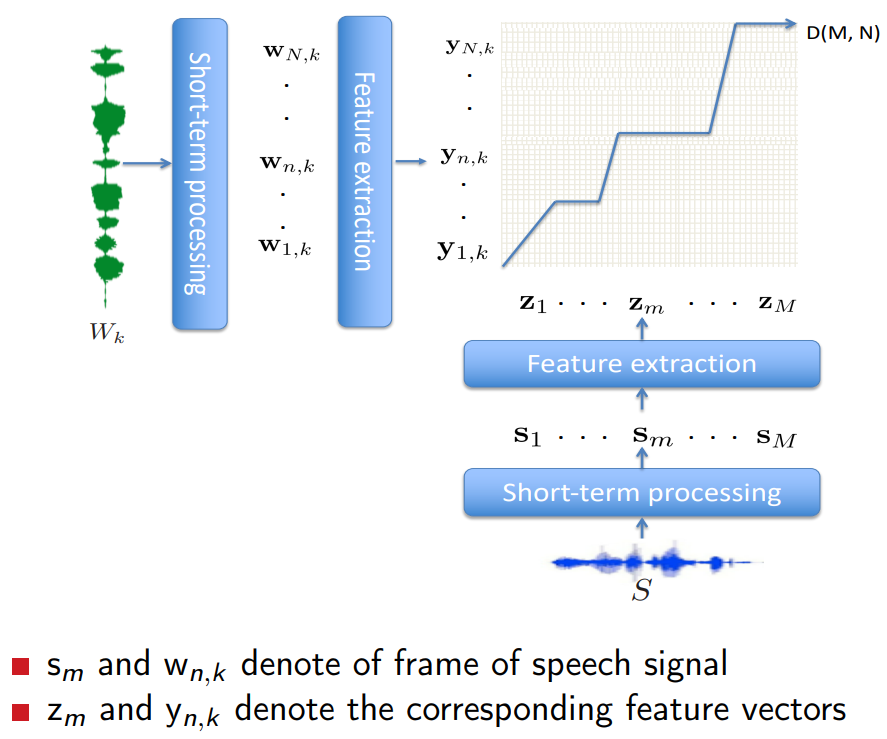

Lecture 3, using the cepstral coefficients and the energy, as well as the dynamics (derivatives) (first or second order), we get the feature vector. And we use the sequence of the feature vectors, to compare and match the instance to the input speech signal and recognize the spoken instance/word.

We need to come up with a method to compare and match two sequences that are not necessarily with the same length, $S$ & $W$ can have different lengths $M$ & $N$, which is the same problem faced in string matching.

A local score will have to be decided, which was easily decided as the L2 euclidian distance, for the main reason of that the cepstral coefficients, the energies and the dynamics are decorrelated, so the euclidian distance can be chosen, and can guarantee that it will find the local optimum (in order to find the global optimum afterwards).
Euclidian distance can be used because this is dynamic proramming & we are using cepstral features and they are decorrelated. Distance measure function HAS to be well chosen, other wise our solution might be sub-optimal.
For example, we cannot use the euclidian distance with the linear prediction coefficients, since they are not decorrelated.

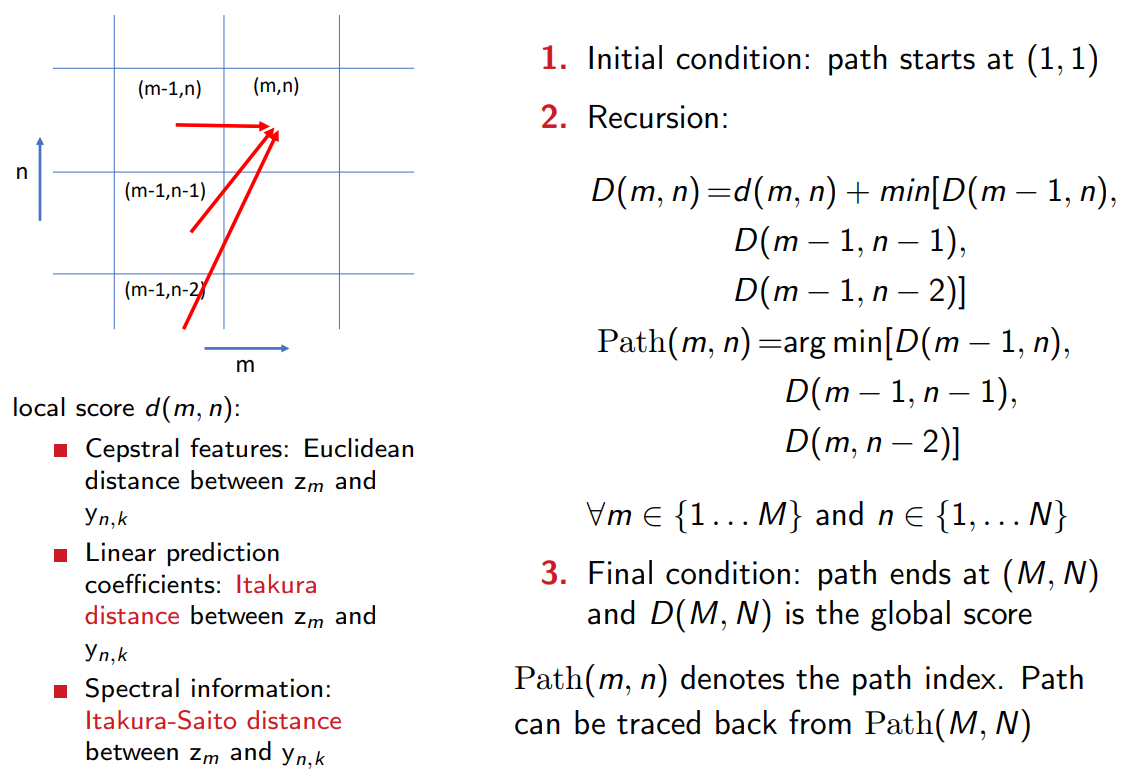

We would never have a 0 distance, even if everything was in a controlled environment. So to be practical, the closer to 0, the more probable we are matching the same sequence of feature vectors (which is basically matching the phone/syllable).

In dynamic programming, there are local constraints, that for example, let us advance in the reference sequence, but stay in the same test feature vector, until we match it with a reference feature vector. This way, we match every m, so every test feature vector, but we can easily skip some n steps. These local constraints are what makes dynamic time warping, that makes it possible, to a certain degree, to match different-lengths sequences.
But also, there were other types of constraints, as to not get further than n-steps from the diagonal judging it to be too expensive, etc...

For this approach, we do not generate a-priori all the sentences to match, but rather all the words, so at the beginning of every word, we would be looking at the end of all words (including the same word) (across word constraint).
So let's say we have one test sequence, and let's limit the reference words to three words, of different lengths.
The first time step in the test sequence, there is a language model that predicts the said word, and we can only come from the initial dummy state, and the language model is going to decide what is the 'transition probability' or rather the probability of the sentence to start with the given word. Using the same logic, the last time step for each test word is going to have a 100% probability to end the sentence, to the final dummy state, since with the end of the test feature vector sequence, it can only go there. (2 constraints so far).

The moment we go to time step 2 ($Z_{2}$) for the first time step for all reference words ($Y_{k, 1} \space \forall k$), so at the beginning of each reference word, we start asking ourselves what is the probability we could have come from the end of any of the words (including the same reference word).

Now once we get to the end point, we check which end is giving us the minimum distance and keep backtracking the time steps, until we get to the first word, which is exactly why the path history has to be kept. But this process it time-consuming, to go backtracking through all of the time steps, which is why they came up with recording at what time step I got into a new word (and what is that word), this way, we only keep the relevant information, and not ALL of that data, just at what time step I moved from where to where (which word to which word) and record it. This is called the One-Stage Dynamic Programming.

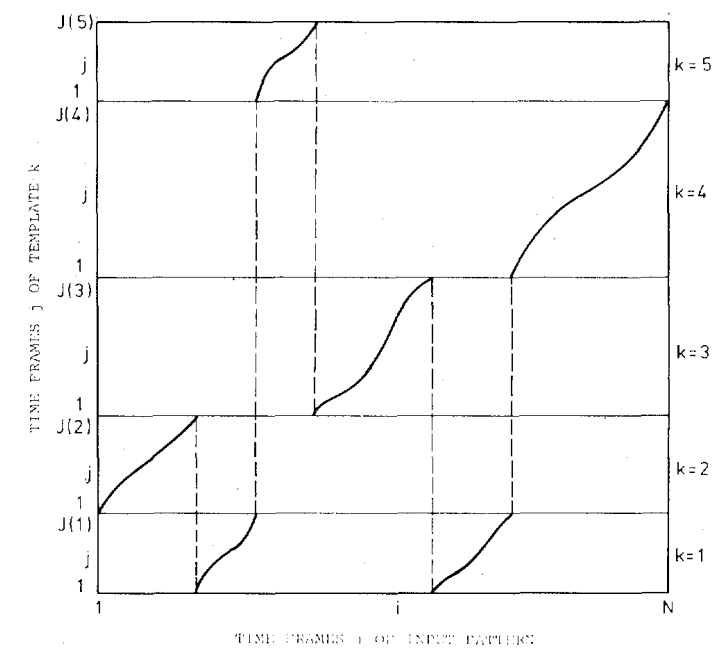

Now coming back to answer the four subquestions: 

1. Short-term spectral feature vectors are the latent symbols. The set of symbols is undefined, as there is no unique feature vector representation for speech sounds due to variabilities (inter- and intra- speaker variabilities). It cannot be considered a closed set, although we can use representation learning to map them to a variability-independant space, but still they cannot be considered a closed set, but much more compact.
2. Short-term speech processing-based feature extraction.
3. Short-term speech processing-based feature extraction.
4. Dynamic programming (ie. DTW) with appropriate local score and local constraints.


This approach works well, but it still has limitations. Using cepstral coefficients, it works well for speaker-dependant, in clean and controlled environments and conditions. Generalization across speakers and conditions is a challenging problem, but representation learning solves this problem. Every new word would need a new reference template. Large amount of CPU and memory requirements. BUT its pro is the fact that there is no training needed.

#### Different feature representations

Having two representation feature vectors, how to compare between them. Suppose we only have acoustics of two words, and we want to determine whether they are the same word or not. We perform dynamic programming to compute the distance between both words, and then divide by the path length. We compare that with a threshold $\Delta$. This threshold $\Delta$ can never be 0, it would be empirical. If the value is lower or equal to $\Delta$, it would be the same word, else it would be a different word. 

Best feature representations are the ones where we can easily differentiate between different words AND the same words are close to one another ($\Delta$ is low enough) (Where the confusion area between same word distribution and different word distribution is smaller, ideally non-existant, the further the distributions, the better the feature representation).

We can easily see the similarity between the distance divided by the path length and an estimate of the likelihood ratio of it being the same word over it not being the same word. $$\frac{D(M, N)}{path\space length} \approx \frac{P_{z, y}(w_{1}\neq w_{2})}{P_{z, y}(w_{1} = w_{2})}$$

# Instance-based Approach

We store all the words that might be used. We can easily perform the speech recognition directly on the features representation of the audio signal and not directly on the audio signal. 

Feature vector in Lecture 3, using the cepstral coefficients and more, we get a seqemce of feature vectors. DIffernet lengths comparison to match S & W, difference is we have a sequence of feature vectors and not a sequence of phones or raw audio rignal. 
Euclidian distance can be used because this is dynamic proramming & we are using cepstral features and they are decorrelated. Distance measure function HAS to be well chosen, other wise our solution might be sub-optimal. 

We would practically never have a 0 distance, but the closer to 0, the more probable we are matching the same sequence.

Dynamic Programming, dynamc time warping to be able to optimize comparison better. 

They were putting more constraints in dynamic programming, but we basically have to go through every step in the test speech, and we can skip from the reference speech.

Across word constraint: First time step, we can only come from the initial dummpy state. We first have the transition probability of the given word to start after the initial state. The end of the diagram we can end the sequence so we can pass to the final dummy state. Other than that, for every time step after $Z_{1}$ for the first frame of the reference word $Y_{1}^{1}$ (For a reference word $W_{1}$ and a test feature vector $Z$), we get the probability to be there after the end of every word in the reference words set, including the current word. This can be a bit optimized with beam search (heuristics) to reduce the reference words set.

Now after having done all of that for the test feature vector for all reference words, we go to the end $Z_{M}$, and check which sequence of words gives us the minimum distance for the test feature vector. And in theory we can trace it back to get the sequence of words. But practically, for each time frame, we check if we entered a new word, if yes, then we store the time frames for which we entered a new word, called `One-Stage Dynamic Programming`.

This can still be used for HMMs, all that is going to change is going to be the idea of transition probabilities and emission probabilities. 

### Comparing Representation Features

We get two words' features representation and predict whether these two words are the same or not, we get the distance of both words using dynamic programming, divide by the path length and then compare it with the threshold $\Delta$. Best feature representations are the ones we can easily differentiate between.

We can easily consider that the distance divided by the path length is an estimate of the likelihood ratio of it not being the same word over it not being the same word, given the feature representations. 